<a href="https://www.kaggle.com/code/bharat04/data-science-jobs-analysis?scriptVersionId=102201209" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


# What can we get from this dataset?

**1. Average salary according to job profile?**

**2. which region is far Developed in data science jobs.
 and which is not?**
 
**3. which is the most used currency to pay data science employee?**

**4. which is the most vibrent job profile in data science jobs?**

**5. How does experience affect salary of data science employee?**

**6. Region wise EDA of data science jobs.**

etc...

# Complete EDA about Data Science job and salary

**Quick overview of dataset**

In [2]:
#Importing  important Libraries  

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
px_template = "simple_white"

In [3]:
# reading dataset

df = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [4]:
#checking shape of a dataset (rowa and columns)
df.shape

(607, 12)

In [5]:
#checking columns name in this dataset
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
#checking the information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
#describing dataset (numerical variables)
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
#checking unique values in different variables

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Unnamed: 0,607
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3


# Cleaning of Dataset

**droping columns**

In [9]:
#droping unwanted columns from dataset
df.drop(columns=["Unnamed: 0","salary"] , inplace = True)

In [10]:
#checking the null values in dataset(columns)

df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**result:**

**their is no null values in this dataset**

In [11]:
#checking unique values in variable company_location
df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

**Region wise grouping of comapany location.**

In [12]:
# grouping the company_location variable acording to thier reginol location 
#and making new variable company_regions

# North America
a = df["company_location"].replace(dict.fromkeys(["US","CA","MX","AS","HN"] , "North America"))

#Europ
b = a.replace(dict.fromkeys(['GB','DE','FR','IT','RU','RO','NL','HU','ES','GR','AT','PT','PL','LU','DK','CZ','SI','CH','BE','EE','IE','VA','MD','MT','UA','HR'] , "Europe"))

#South America
c = b.replace(dict.fromkeys(['BR','CL','CO'] , "South America"))

#Africa
d = c.replace(dict.fromkeys(['NG','KE','DZ'] , "Africa"))

#Oceania 
e = d.replace(dict.fromkeys(['NZ','AU'] , "Oceania"))

#Asia
df["company_regions"] = e.replace(dict.fromkeys(['IN','JP','PK','TR','CN','AE','VN','MY','SG','IR','IL','IQ'] , "Asia"))

In [13]:
#checking value counts of new variable company_regions
df["company_regions"].value_counts()

North America    390
Europe           157
Asia              47
South America      5
Oceania            4
Africa             4
Name: company_regions, dtype: int64

In [14]:
#droping variable company_locatin
df.drop(columns="company_location" , inplace = True)

In [15]:
#checking unique values of variable employee_residence
df.employee_residence.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

**Region wise grouping of employee_residence.**


In [16]:
# grouping the employee_residence variable acording to thier reginol location 
#and making new variable employee_resi_regions

#North America
a = df["employee_residence"].replace(dict.fromkeys(["US","CA","MX","AS","HN",'PR'] , "North America"))

#Europ
b = a.replace(dict.fromkeys(['BG','RS','JE','GB','DE','FR','IT','RU','RO','NL','HU','ES','GR','AT','PT','PL','LU','DK','CZ','SI','CH','BE','EE','IE','VA','MD','MT','UA','HR'] , "Europe"))

#South America
c = b.replace(dict.fromkeys(['BR','CL','CO','AR','BO'] , "South America"))

#Africa
d = c.replace(dict.fromkeys(['NG','KE','DZ','TN'] , "Africa"))

#Oceania
e = d.replace(dict.fromkeys(['NZ','AU'] , "Oceania"))

#Asia
df["employee_resi_regions"] = e.replace(dict.fromkeys(['IN','JP','PK','TR','CN','AE','VN','MY','SG','IR','IL','IQ','PH','HK'] , "Asia"))

#checking the value counts of new variable employee_resi_regions

df["employee_resi_regions"].value_counts()

North America    365
Europe           163
Asia              60
South America     10
Africa             5
Oceania            4
Name: employee_resi_regions, dtype: int64

In [17]:
#droping employee_residence variable
df.drop(columns="employee_residence" , inplace = True)

In [18]:
#checking the unique values of job_title variable
df.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

**creating job Department to add job titles in it.**

In [19]:
# separating job_titles according to thier department 
# making new variable job_department

#Data Scientist
a = df.job_title.str.contains('Data Scientist')
df.loc[a, 'job_department'] = 'Data Scientist'

#Data Analyst
a = df.job_title.str.contains('Data Analyst')
df.loc[a, 'job_department'] = 'Data Analyst'

#Data Engineer
a = df.job_title.str.contains('Data Engineer')
df.loc[a, 'job_department'] = 'Data Engineer'


#ML Engineer -> Machine Learning Engineer
a = df['job_title'] == 'ML Engineer'
df.loc[a, 'job_department'] = 'Machine Learning Engineer'

a = df['job_title'] == 'NLP Engineer'
df.loc[a, 'job_department'] = 'Machine Learning Engineer'

a = df['job_title'] == 'Machine Learning Developer'
df.loc[a, 'job_department'] = 'Machine Learning Engineer'

a = df.job_title.str.contains('Machine Learning')
df.loc[a, 'job_department'] = 'Machine Learning Engineer'

a = df.job_title.str.contains('Machine Learning Scientist')
df.loc[a, 'job_department'] = 'Machine Learning Engineer'


#Manager
a = df.job_title.str.contains('Manager')
df.loc[a, 'job_department'] = 'Manager'

a = df.job_title.str.contains('Lead')
df.loc[a, 'job_department'] = 'Manager'

a = df.job_title.str.contains('Director')
df.loc[a, 'job_department'] = 'Manager'

a = df.job_title.str.contains('Head')
df.loc[a, 'job_department'] = 'Manager'

df["job_department"].value_counts()

Data Scientist               156
Data Engineer                145
Data Analyst                 116
Machine Learning Engineer     66
Manager                       58
Name: job_department, dtype: int64

In [20]:
#droping job_title variable
df.drop(columns="job_title" , inplace = True)

In [21]:
#checking dataset after cleaning (top  rows )
df.head(2)

,work_year,experience_level,employment_type,salary_currency,salary_in_usd,remote_ratio,company_size,company_regions,employee_resi_regions,job_department
0,2020,MI,FT,EUR,79833,0,L,Europe,Europe,Data Scientist
1,2020,SE,FT,USD,260000,0,S,Asia,Asia,Machine Learning Engineer


# Content

***Column             :               Description***

**work_year** : The year the salary was paid.

**experience_level** :  The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

**employment_type** :    The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

**job_department** :  The role worked in during the year.


**salary_currency** :  The currency of the salary paid as an ISO 4217 currency code.


**salaryinusd** :  The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).


**employee_resi_region** :  Employee's primary region of residence in during the work year as an ISO 3166 country code.

**remote_ratio** :  The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

**company_region** :  The country of the employer's main office or contracting branch as an ISO 3166 country code.


**company_size** :   The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large

# Taking insigths from dataset and visualizing them 

In [22]:
fig = px.pie(df,names = "job_department",title = "Job department", template = px_template)
fig.update_traces(textinfo='value')
fig.show()

**result :**

**data scientist is the most preffreble job profile in data science filed.**

**after data scientist we have data Engineer and data analyst jobs.**

In [23]:
#checking the growth in tech jobs from 2020 to 2022

pd.crosstab(df.work_year,df.job_department)



job_department,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Manager
work_year,,,,,
2020,12,14,22,8,10
2021,27,42,53,30,30
2022,77,89,81,28,18


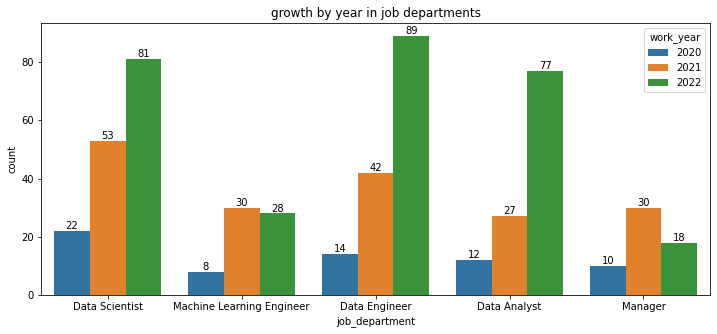

In [24]:
#checking the growth in tech jobs from 2020 to 2022 using bar graph


plt.figure(figsize=(12,5))

ax = sns.countplot(x= "job_department"  , hue = "work_year"   , data = df)

plt.title("growth by year in job departments")

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)



**result:**

**best job according to work year in data science is :**

for 2020 it is data scientist.

for 2021 again it is data scientist.

and for 2022 we noticed a hike in data engineer and data analyst jobs.



In [25]:
# average paid salary in different year 
#salary in USD($)

a = pd.crosstab(columns = "count" , index = df.work_year , values= df.salary_in_usd , aggfunc= np.mean )
a

col_0,count
work_year,
2020,95813.000000
2021,99853.792627
2022,124522.006289


Text(0.5, 1.0, 'Average salary over the year')

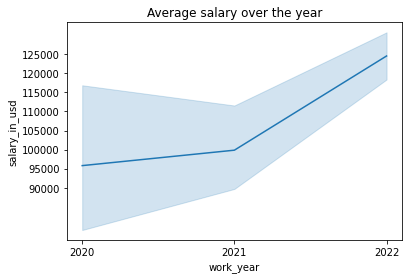

In [26]:
# average paid salary in different year by line graph


sns.lineplot(x= "work_year", y= "salary_in_usd" , data = df );

plt.xticks(df["work_year"].unique());
plt.yticks(np.arange(90000,130000,5000));
plt.title("Average salary over the year")


**result:**

**we can see here that average salary in the field of data scince is increasing year by year**

**Also we can see here is a massive hike in average salary in the year of 2021 to 2022.**

In [27]:
#checking the average salary and salary growth from 2020 to 2022 of different jobs
# salary in USD ($)

pd.crosstab(index = df.job_department ,columns=df.work_year,values = df.salary_in_usd , aggfunc= np.mean )


work_year,2020,2021,2022
job_department,,,
Data Analyst,56491.916667,93769.444444,98760.493506
Data Engineer,90203.785714,95702.285714,126375.696629
Data Scientist,88801.909091,87646.509434,140270.679012
Machine Learning Engineer,119136.875000,111615.900000,112048.785714
Manager,134444.000000,146831.733333,159606.055556


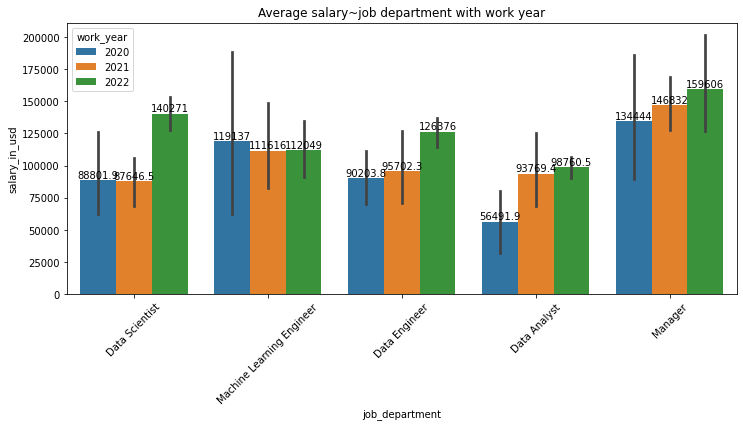

In [28]:
#checking the average salary and salary growth from 2020 to 2022 of different jobs using bar graph
# salary in USD ($)

plt.figure(figsize=(12,5))

ax = sns.barplot(x = "job_department" , y = "salary_in_usd" , hue = "work_year" , data = df  )
plt.xticks(rotation=45);
plt.title("Average salary~job department with work year")


for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

**result :**


**Manager Job Profile is the highest paid job profile in the field of Data Science.**

**After that Data Scientist and Data Engineer come in second and third place respectively**

In [29]:
#checking the number of experienced employee


pd.crosstab(columns = "count" ,index = df.experience_level)

col_0,count
experience_level,
EN,88
EX,26
MI,213
SE,280


In [30]:
#checking the number of experienced employee using pie


fig = px.pie(df,names = "experience_level",title = "experience level", template = px_template)
fig.update_traces(textinfo='value')
fig.show()

In [31]:
#experienced employees number in different data science job profiles

pd.crosstab(df.experience_level , df.job_department)

job_department,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Manager
experience_level,,,,,
EN,17,15,23,14,0
EX,3,5,1,0,14
MI,39,57,63,26,9
SE,57,68,69,26,35


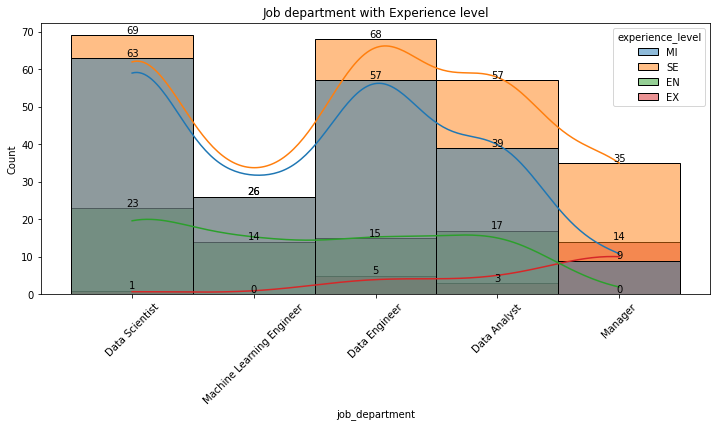

In [32]:
#experienced employees number in different data science job profiles histogram

plt.figure(figsize=(12,5))

ax = sns.histplot(x = "job_department" , hue = "experience_level" , data = df  , kde = True )

plt.title("Job department with Experience level")

plt.xticks(rotation=45);

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

/**result :**

**Entery level(EN):**

Data Scientist(23) job profile has maximum number of entry level employees.after that data analyst(17) and data engineer(15) comes.

**MI Mid-level / Intermediate:**

Data Scientist(63) job profile has maximum number of Mid-level employees.after that data engineer(57) and data analyts(39) comes.

**SE Senior-level / Expert:**

Data Scientist(69) job profile has maximum number of Senior-level employees.after that data engineer(68) and data analyts(57) comes.

**EX Executive-level /Director:**

manager(9) job profile has maximum number of Executive-level employees.after that data engineer(5) and data analyts(3) comes.


In [33]:
#average salary of fifferent job profiles with experience level

pd.crosstab(index = df.job_department , columns=df.experience_level , values = df.salary_in_usd , aggfunc= np.mean )


experience_level,EN,EX,MI,SE
job_department,,,,
Data Analyst,57111.882353,130000.000000,79204.153846,111655.649123
Data Engineer,53287.466667,316400.000000,83283.245614,138254.838235
Data Scientist,57709.434783,416000.000000,83882.317460,158448.246377
Machine Learning Engineer,84127.928571,NaN,96262.923077,144550.423077
Manager,NaN,172603.714286,97765.111111,152170.371429


Text(0.5, 1.0, 'Average salary of jobs according to Experince level')

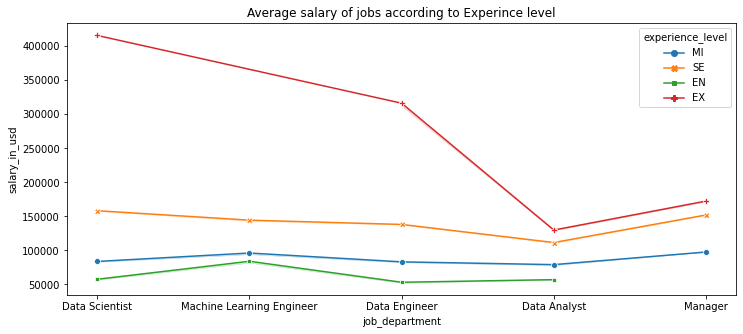

In [34]:
#average salary of fifferent job profiles with experience level using line chart


plt.figure(figsize=(12,5))

sns.lineplot( x = "job_department" , y = "salary_in_usd" , hue = "experience_level" 
             , data =df , ci = 0 , style="experience_level" ,markers=True, dashes=False )
plt.title("Average salary of jobs according to Experince level")



**result:**

**we can clearly see here that their is no chance of entry level employees for the role of manager**

**we can see hare that there is a increament in salary when we go from entry level to executive level.**

**we can clearly saw that the level of experience affect salary in a positive way.**

In [35]:
#region wise experienced employees number 

pd.crosstab(df.experience_level , df.employee_resi_regions)

employee_resi_regions,Africa,Asia,Europe,North America,Oceania,South America
experience_level,,,,,,
EN,4,19,29,32,2,2
EX,0,2,7,17,0,0
MI,1,27,92,89,1,3
SE,0,12,35,227,1,5


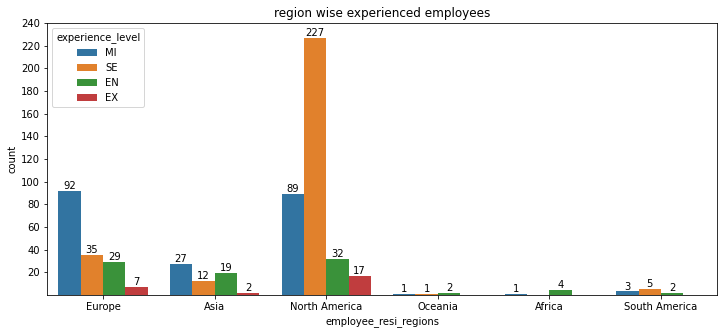

In [36]:
#region wise experienced employees number by bar graph


plt.figure(figsize=(12,5))


ax = sns.countplot(x = "employee_resi_regions", hue = "experience_level"  , data = df  )

plt.yticks(np.arange(20,260,20));
plt.title("region wise experienced employees")


for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

**result:**

**most number of Senior-level experienced employee come from North America specially from USA.after that Europe and Asia comes respectivlly.**

**most number of mid level employees come from Europe.**

In [37]:
# number of employees according to thrie work type 

pd.crosstab(columns = "count" ,index = df.employment_type)

col_0,count
employment_type,
CT,5
FL,4
FT,588
PT,10


In [38]:
# number of employees according to thrie work type using pie


fig = px.pie(df,names = "employment_type",title = "Employment Type", template = px_template)
fig.update_traces(textinfo='value')
fig.show()

In [39]:
#employees working preffrence according to thier job profile

pd.crosstab(df.employment_type,df.job_department )


job_department,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Manager
employment_type,,,,,
CT,1,0,2,2,0
FL,0,1,1,1,0
FT,114,142,151,62,58
PT,1,2,2,1,0


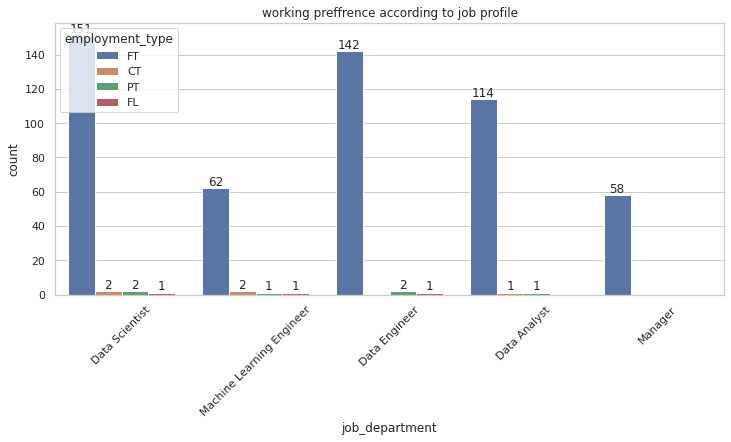

In [40]:
#employees working preffrence according to thier job profile using countplot


plt.figure(figsize=(12,5))

sns.set(style="whitegrid")

ax = sns.countplot(x ="job_department" , hue = "employment_type" , data = df )

plt.xticks(rotation=45);

plt.title("working preffrence according to job profile")

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

**result:**

**We can say that you must be a full time employee to work in the field of data science.**

**there is very low chance for CT (Contract) FL (Freelance) and PT (part time) employees in data science**

<Figure size 1440x720 with 0 Axes>

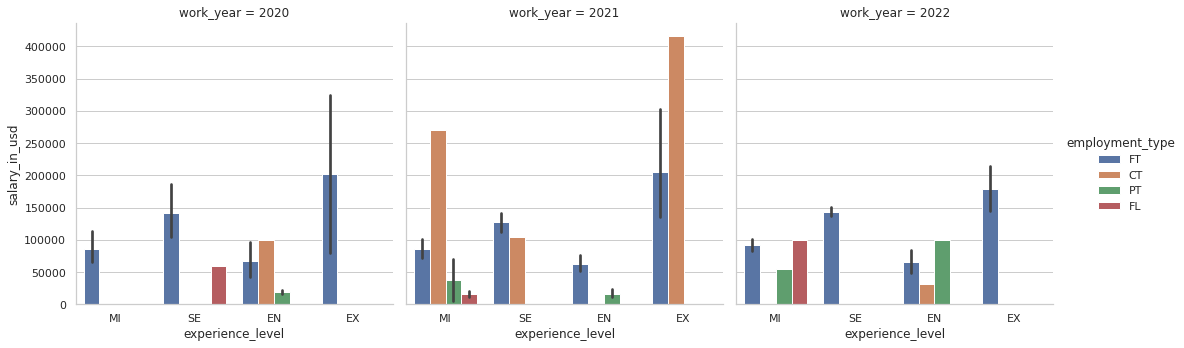

In [41]:
#average salary of employees according to thier Employment type and job profile in work years

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")

ax = sns.catplot(data=df,x='experience_level',y='salary_in_usd',hue='employment_type',col='work_year',kind='bar')

plt.show()

In [42]:
#mostly used currency to pay employees

pd.crosstab(columns = "count" ,index = df.salary_currency).T

salary_currency,AUD,BRL,CAD,CHF,CLP,CNY,DKK,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
col_0,,,,,,,,,,,,,,,,,
count,2,2,18,1,1,2,2,95,44,2,27,3,2,3,2,3,398


In [43]:
#mostly used currency to pay employees using pie chart


fig = px.pie(df,names = "salary_currency",title = "Currency used to pay employee", template = px_template)
fig.update_traces(textinfo='value')
fig.show()

In [44]:
#currency used by different type of company to pay employees 

pd.crosstab(df.salary_currency,df.company_size ).T


salary_currency,AUD,BRL,CAD,CHF,CLP,CNY,DKK,EUR,GBP,HUF,INR,JPY,MXN,PLN,SGD,TRY,USD
company_size,,,,,,,,,,,,,,,,,
L,1,0,10,1,1,1,0,37,11,2,15,0,0,3,1,1,114
M,1,1,6,0,0,1,0,38,30,0,7,0,0,0,1,2,239
S,0,1,2,0,0,0,2,20,3,0,5,3,2,0,0,0,45


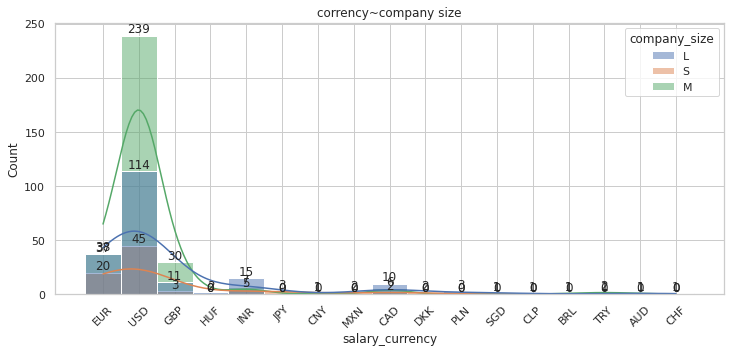

In [45]:
#currency used by different type of company to pay employees using histplot


plt.figure(figsize=(12,5))

sns.set(style="whitegrid")

ax = sns.histplot(x ="salary_currency" , hue = "company_size" , data = df , kde= True )

plt.title("corrency~company size")
plt.xticks(rotation=45);

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

**result:**

**USD is the most use currency to pay employees.**

**all type of company(L M S) preffer USD to pay their employees.after that EUR and GBP comes respectivlly.**



In [46]:
#avarage salary of job profiles in different type of companys

pd.crosstab(index = df.job_department , columns=df.company_size , values = df.salary_in_usd , aggfunc= np.mean )



company_size,L,M,S
job_department,,,
Data Analyst,96708.500000,99398.600000,45112.000000
Data Engineer,110147.409091,119491.282609,76678.000000
Data Scientist,115724.075472,127419.938272,68474.590909
Machine Learning Engineer,125556.739130,111072.833333,99230.789474
Manager,160674.833333,143970.105263,118513.777778


Text(0.5, 1.0, 'average salary in jobs~company size')

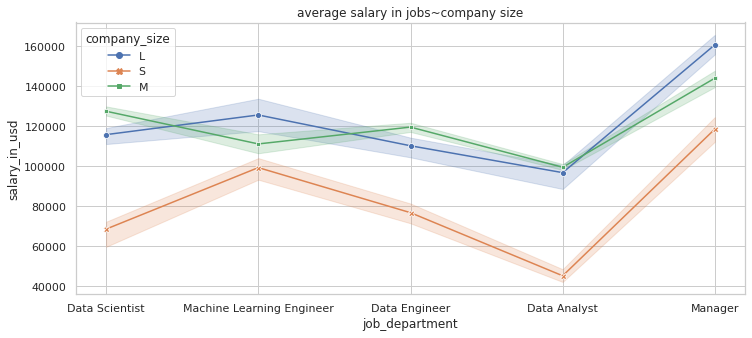

In [47]:
#avarage salary of job profiles in different type of companys using line chart


plt.figure(figsize=(12,5))

sns.lineplot( x = "job_department" , y = "salary_in_usd" , hue = "company_size" 
             , data =df , ci = 28 , style="company_size" ,markers=True, dashes=False )
plt.title("average salary in jobs~company size")


**result:**

**medium size company pay more to data scientist , data engineer and data analyst then large size company.**

**large size company give high salary to Machine Learning Engineer and Managers.**


In [48]:
#remote ratio of employees 

pd.crosstab(index = df.remote_ratio , columns = df.work_year)


work_year,2020,2021,2022
remote_ratio,,,
0,15,34,78
50,21,66,12
100,36,117,228


Text(0.5, 1.0, 'Remote ratio')

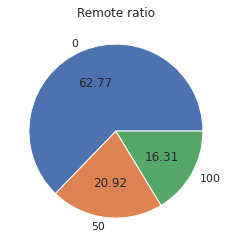

In [49]:
#remote ratio of employees using pie chart

plt.pie(df["remote_ratio"].value_counts(), labels = df["remote_ratio"].unique(),autopct='%.02f');

plt.title("Remote ratio")


In [50]:
#remote ratio in different work year and company size

pd.crosstab(columns =df.remote_ratio, index = [df.company_size , df.work_year])


remote_ratio            0    50   100
company_size work_year               
L            2020         3   13   17
             2021        19   38   62
             2022        10    9   27
M            2020         5    2    7
             2021         8   16   29
             2022        66    3  190
S            2020         7    6   12
             2021         7   12   26
             2022         2    0   11

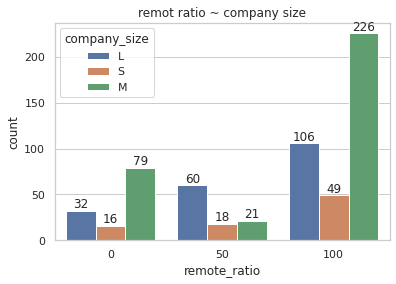

In [51]:
#remote ratio in different company size

ax = sns.countplot(x = "remote_ratio" , hue = "company_size" ,data = df)
plt.title("remot ratio ~ company size")

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)



**result:**

**62.77% people preffer no remote work.**

**medium size company are more comfertable whit remote work then large and small size companies.**

**We saw a huge increase in remote working in the year of 2021 and 2022. We can say that the reason behind this is covid 19.**

In [52]:
#company size numbers in different regions

pd.crosstab(df.company_size,df.company_regions )


company_regions,Africa,Asia,Europe,North America,Oceania,South America
company_size,,,,,,
L,1,19,58,118,1,1
M,1,15,72,234,1,3
S,2,13,27,38,2,1


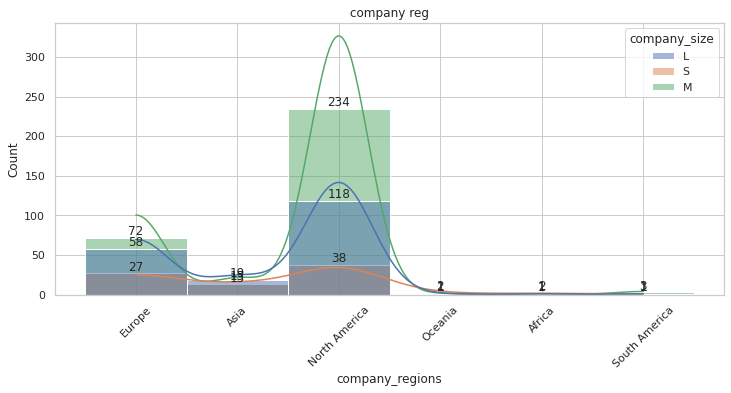

In [53]:
#company size numbers in different regions using hist plot


plt.figure(figsize=(12,5))

sns.set(style="whitegrid")

ax = sns.histplot(x ="company_regions" , hue = "company_size" , data = df , kde= True )
plt.title("company reg")
plt.xticks(rotation=45);

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

**result:**

**North America specially USA has the highest number of Large , medium and small size companies.**

**North America is followed by Europe and Aisa respectively**

In [54]:
#employee come from which region according to thier job profile 

pd.crosstab(df.job_department,df.employee_resi_regions )


employee_resi_regions,Africa,Asia,Europe,North America,Oceania,South America
job_department,,,,,,
Data Analyst,2,5,19,90,0,0
Data Engineer,0,13,44,87,0,1
Data Scientist,2,14,43,93,1,3
Machine Learning Engineer,1,13,20,29,1,2
Manager,0,8,13,36,1,0


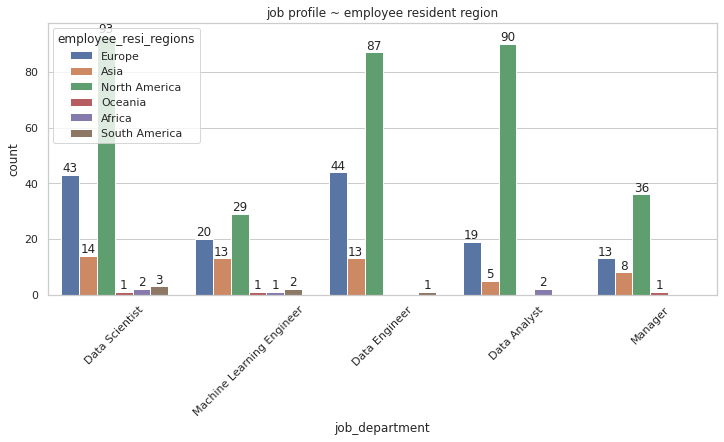

In [55]:
#employee come from which region according to thier job profile using count plot


plt.figure(figsize=(12,5))

sns.set(style="whitegrid")

ax = sns.countplot(x ="job_department" , hue = "employee_resi_regions" , data = df )

plt.xticks(rotation=45);
plt.title("job profile ~ employee resident region")

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

**result:**

**most numbers of data science jobs employees come from North America .**

**North America is followed by Europe and Aisa respectively**

In [56]:
#checking which regions employee preffer remote work

pd.crosstab(df.employee_resi_regions,df.remote_ratio)


remote_ratio,0,50,100
employee_resi_regions,,,
Africa,0,1,4
Asia,14,17,29
Europe,37,54,72
North America,74,24,267
Oceania,0,2,2
South America,2,1,7


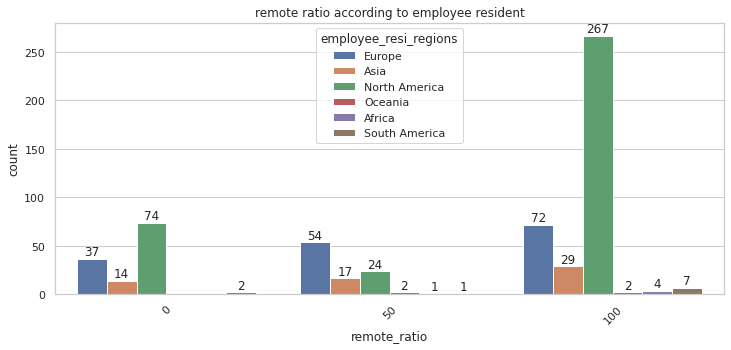

In [57]:
#checking which regions employee preffer remote work using countplot


plt.figure(figsize=(12,5))

sns.set(style="whitegrid")

ax = sns.countplot(x ="remote_ratio" , hue = "employee_resi_regions" , data = df )

plt.xticks(rotation=45);
plt.title("remote ratio according to employee resident")

for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

**result:**

**most numbers of North American data science employee preffer remote work(100).**

**most numbers of Europien data science employee preffer Partially remote work(50).**



# conclusion


**1.data scientist , data engineer and data analyst is the most Ideal job profile in the field of Data science.**

**2.for an Entry level employee data scientist and data analyst job profiles are best to apply.**

**3.You have to increase your experience level to get a good high salary**


**4. North America is a very developed region in the field of data science. They have a large number of skilled employees and have many large, medium and small companies.**

**5.Africa and Oceania region is least developed in the field of data science.**

**6.there are many job roles in the field of data science but the most vibrant job profile is data science.**

**hey guys if you like this please upvote.**

**for any suggetion please comment.**